In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten #,BatchNormalization
# from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
width,height = 150,150

In [3]:
data_directory = r'C:\Users\solan\Downloads\Indian Notes Currency Classifier\data' 

In [4]:
data_generation = ImageDataGenerator(rescale=1./255,
                                     rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    validation_split=0.2)

In [5]:
train_data = data_generation.flow_from_directory(
    data_directory,
    target_size=(height, width),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 840 images belonging to 7 classes.


In [6]:
class_indices = train_data.class_indices
print(class_indices)

{'10': 0, '100': 1, '20': 2, '200': 3, '2000': 4, '50': 5, '500': 6}


In [7]:
# Access the class indices
class_indices = train_data.class_indices

# Invert the dictionary to get a mapping from indices to class names
classes = {v: k for k, v in class_indices.items()}

# Get the list of classes sorted by their index
sorted_classes = [classes[i] for i in range(len(classes))]

# Print the list of classes
print("List of classes:", sorted_classes)

List of classes: ['10', '100', '20', '200', '2000', '50', '500']


In [8]:
test_data = data_generation.flow_from_directory(
    data_directory,
    target_size=(height, width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 210 images belonging to 7 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(width, height, 3), activation='relu'),
    # BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    # BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),
])

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 144, 144, 64)      36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 142, 142, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 322624)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [12]:
# Define ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint('best_currency_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [13]:
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_data=test_data,
    validation_steps=test_data.samples // test_data.batch_size,
    epochs=50,
    callbacks=[checkpoint],
    verbose=1,
)

Epoch 1/50
26/26 [==============================] - 24s 297ms/step - loss: 2.6987 - accuracy: 0.2129 - val_loss: 1.6818 - val_accuracy: 0.1927

Epoch 00001: val_accuracy improved from -inf to 0.19271, saving model to best_currency_model.h5
Epoch 2/50
26/26 [==============================] - 6s 240ms/step - loss: 1.5098 - accuracy: 0.3639 - val_loss: 1.0082 - val_accuracy: 0.5938

Epoch 00002: val_accuracy improved from 0.19271 to 0.59375, saving model to best_currency_model.h5
Epoch 3/50
26/26 [==============================] - 7s 247ms/step - loss: 0.9035 - accuracy: 0.6559 - val_loss: 0.4565 - val_accuracy: 0.8854

Epoch 00003: val_accuracy improved from 0.59375 to 0.88542, saving model to best_currency_model.h5
Epoch 4/50
26/26 [==============================] - 7s 254ms/step - loss: 0.6198 - accuracy: 0.7710 - val_loss: 0.4286 - val_accuracy: 0.8646

Epoch 00004: val_accuracy did not improve from 0.88542
Epoch 5/50
26/26 [==============================] - 7s 250ms/step - loss: 0.55

In [14]:
# model.save('currency_model_updated_With_best.h5')

In [15]:
# Evaluate the model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('best_currency_model.h5')

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the image from file
img_path = r'image.webp'  # Replace with your image path
img = load_img(img_path, target_size=(150, 150))  # Load image and resize to 150x150 pixels
img_array = img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch size of 1
img_array /= 255.0  # Rescale pixel values to [0, 1]

In [19]:
# Predict the class probabilities
predictions = model.predict(img_array)

In [20]:
print(np.round(predictions,2))

[[0.   0.99 0.   0.   0.   0.   0.  ]]


In [21]:
np.argmax(predictions,axis=0)

array([0, 0, 0, 0, 0, 0, 0], dtype=int64)

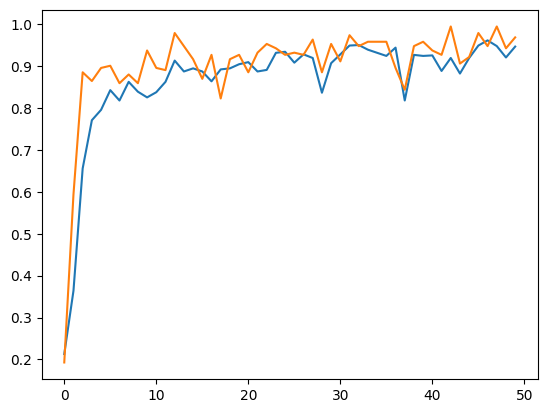

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

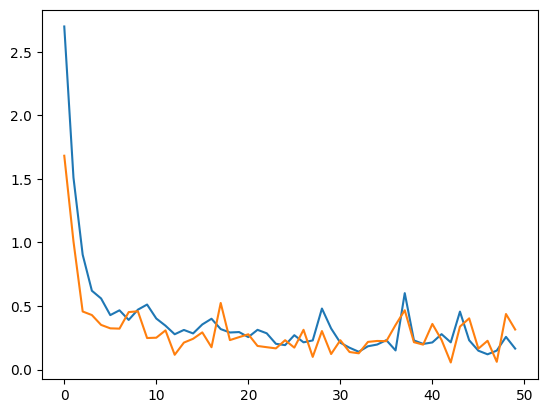

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

### Evaluate the model

In [24]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

7/7 [==============================] - 2s 240ms/step - loss: 0.1519 - accuracy: 0.9571
Test Accuracy: 95.71%


### Confusion Matrix

In [26]:
# Get the true labels and the predicted labels
test_data.reset()  # Reset the generator to make predictions from the start
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

In [27]:
# Get the class labels
class_labels = list(test_data.class_indices.keys())

In [28]:
# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

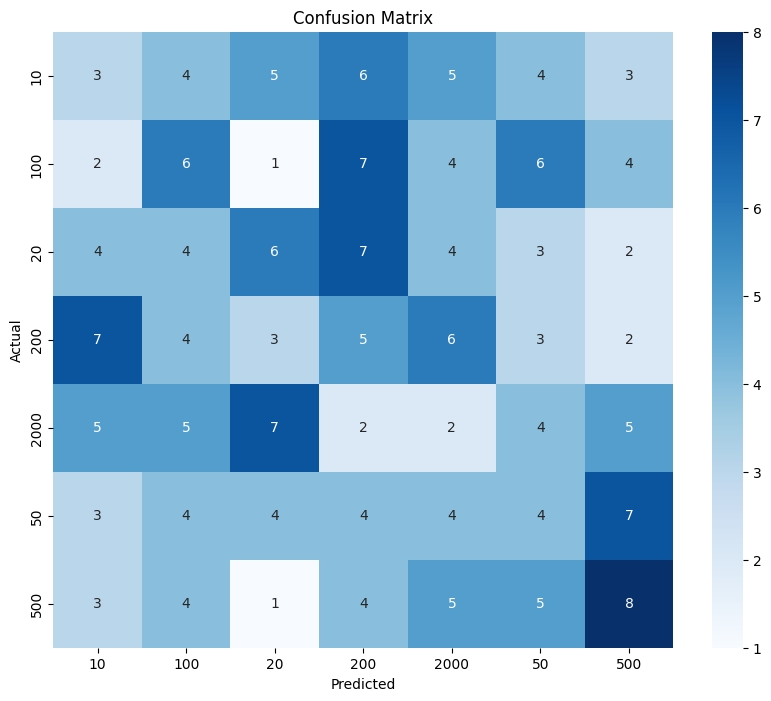

In [29]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

              precision    recall  f1-score   support

          10       0.11      0.10      0.11        30
         100       0.19      0.20      0.20        30
          20       0.22      0.20      0.21        30
         200       0.14      0.17      0.15        30
        2000       0.07      0.07      0.07        30
          50       0.14      0.13      0.14        30
         500       0.26      0.27      0.26        30

    accuracy                           0.16       210
   macro avg       0.16      0.16      0.16       210
weighted avg       0.16      0.16      0.16       210

